In [1]:
pip install tensorflow_datasets -y

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
imdb, info = tfds.load("imdb_reviews",with_info=True, as_supervised=True)

In [5]:
train_data, test_data = imdb['train'], imdb['test']

In [6]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [7]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [11]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())




In [15]:
training_sentences[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [16]:
training_labels[3]

1

In [17]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [18]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [19]:
training_labels_final.size, testing_labels_final.size

(25000, 25000)

In [20]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [22]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [23]:
word_index;

In [26]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [27]:
len(sequences)

25000

In [29]:
len(padded[0])

120

In [30]:
padded.shape

(25000, 120)

In [31]:
testing_padded.shape

(25000, 120)

In [32]:
padded.dtype

dtype('int32')

Build the Model

In [41]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [43]:
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17909 (69.96 KB)
Trainable params: 17909 (69.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the RNN Model

In [44]:
model_rnn.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [45]:
history_rnn = model_rnn.fit(padded, training_labels_final, epochs= 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10



782/782 [==============================] - 28s 33ms/step - loss: 0.6800 - accuracy: 0.5556 - val_loss: 0.5902 - val_accuracy: 0.6967
Epoch 2/10
782/782 [==============================] - 25s 33ms/step - loss: 0.6485 - accuracy: 0.6175 - val_loss: 0.6368 - val_accuracy: 0.6424
Epoch 3/10
782/782 [==============================] - 25s 32ms/step - loss: 0.6664 - accuracy: 0.5942 - val_loss: 0.6052 - val_accuracy: 0.6768
Epoch 4/10
782/782 [==============================] - 25s 32ms/step - loss: 0.6381 - accuracy: 0.6234 - val_loss: 0.5929 - val_accuracy: 0.6818
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.6674 - accuracy: 0.5946 - val_loss: 0.6897 - val_accuracy: 0.5426
Epoch 6/10
782/782 [==============================] - 26s 33ms/step - loss: 0.6665 - accuracy: 0.5850 - val_loss: 0.6090 - val_accuracy: 0.6767
Epoch 7/10
782/782 [==============================] - 25s 32ms/step - loss: 0.6093 - accuracy: 0.6763 - val_loss: 0.6367 - val_accuracy: 0.6816
Epo

In [46]:
import matplotlib.pyplot as plt

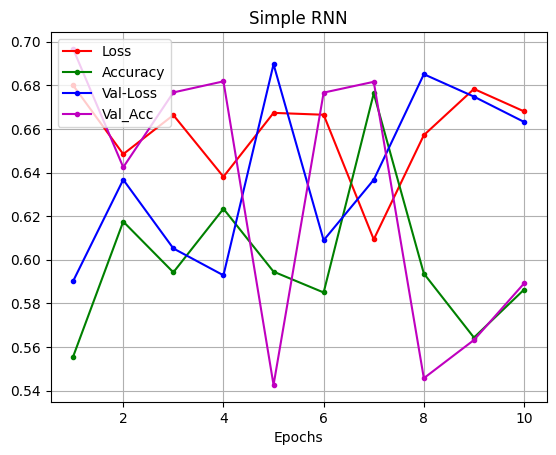

In [48]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_rnn.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_rnn.history['val_loss'], color='b', label='Val-Loss', marker='.')
plt.plot(range(1,11), history_rnn.history['val_accuracy'], color='m', label='Val_Acc', marker='.')
plt.legend(loc='upper left')

Build the model for LSTM

In [49]:
from keras.layers import Bidirectional, GRU, LSTM

In [51]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 29205 (114.08 KB)
Trainable params: 29205 (114.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile LSTM

In [52]:
model_lstm.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

Train LSTM

In [53]:
history_lstm = model_lstm.fit(padded, training_labels_final, epochs= 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 63s 76ms/step - loss: 0.4949 - accuracy: 0.7500 - val_loss: 0.3786 - val_accuracy: 0.8403
Epoch 2/10
782/782 [==============================] - 58s 74ms/step - loss: 0.3920 - accuracy: 0.8276 - val_loss: 0.3529 - val_accuracy: 0.8447
Epoch 3/10
782/782 [==============================] - 58s 74ms/step - loss: 0.3771 - accuracy: 0.8354 - val_loss: 0.3535 - val_accuracy: 0.8444
Epoch 4/10
782/782 [==============================] - 58s 74ms/step - loss: 0.3680 - accuracy: 0.8376 - val_loss: 0.3631 - val_accuracy: 0.8434
Epoch 5/10
782/782 [==============================] - 59s 76ms/step - loss: 0.3556 - accuracy: 0.8438 - val_loss: 0.3694 - val_accuracy: 0.8421
Epoch 6/10
782/782 [==============================] - 59s 76ms/step - loss: 0.3442 - accuracy: 0.8513 - val_loss: 0.3750 - val_accuracy: 0.8411
Epoch 7/10
782/782 [==============================] - 59s 75ms/step - loss: 0.3349 - accuracy: 0.8560 - val_loss: 0.3545 - val_accuracy:

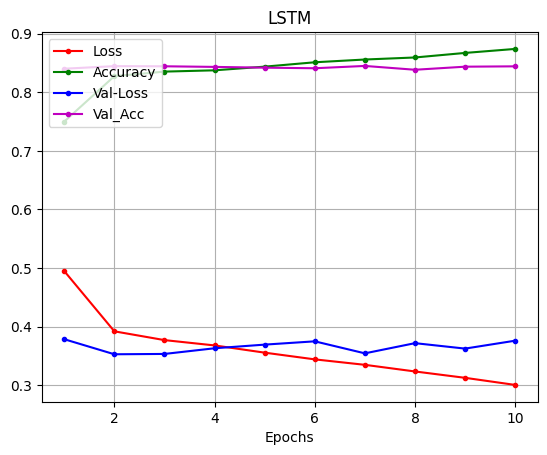

In [56]:
plt.title('LSTM')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label='Val-Loss', marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='m', label='Val_Acc', marker='.')
plt.legend(loc='upper left')

Build Model for GRU

In [57]:
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 26261 (102.58 KB)
Trainable params: 26261 (102.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model_gru.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [59]:
history_gru = model_gru.fit(padded, training_labels_final, epochs= 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 69s 81ms/step - loss: 0.5083 - accuracy: 0.7312 - val_loss: 0.3742 - val_accuracy: 0.8310
Epoch 2/10
782/782 [==============================] - 62s 79ms/step - loss: 0.3897 - accuracy: 0.8255 - val_loss: 0.3572 - val_accuracy: 0.8412
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 0.3722 - accuracy: 0.8372 - val_loss: 0.3523 - val_accuracy: 0.8462
Epoch 4/10
782/782 [==============================] - 61s 78ms/step - loss: 0.3561 - accuracy: 0.8438 - val_loss: 0.3386 - val_accuracy: 0.8522
Epoch 5/10
782/782 [==============================] - 61s 79ms/step - loss: 0.3388 - accuracy: 0.8526 - val_loss: 0.3443 - val_accuracy: 0.8495
Epoch 6/10
782/782 [==============================] - 63s 81ms/step - loss: 0.3245 - accuracy: 0.8595 - val_loss: 0.3424 - val_accuracy: 0.8496
Epoch 7/10
782/782 [==============================] - 61s 79ms/step - loss: 0.3127 - accuracy: 0.8639 - val_loss: 0.3514 - val_accuracy:

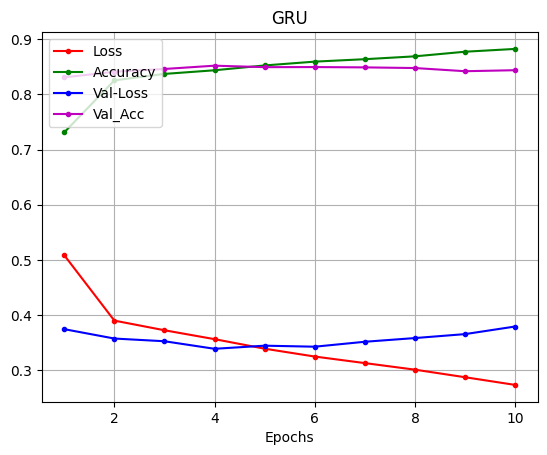

In [60]:
plt.title('GRU')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_gru.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label='Val-Loss', marker='.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='m', label='Val_Acc', marker='.')
plt.legend(loc='upper left')

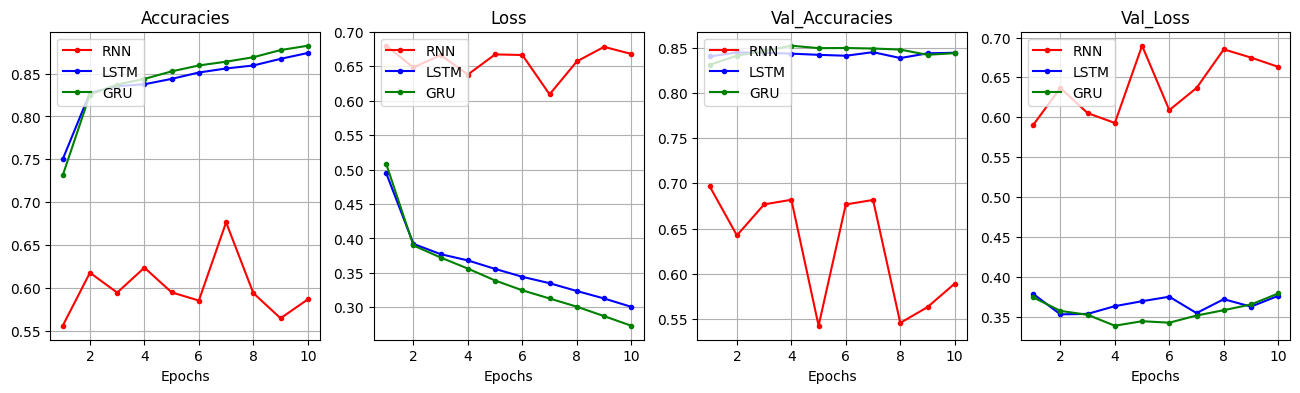

In [76]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 4, 1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['accuracy'], color='r', label= 'RNN', marker= '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='b', label= 'LSTM', marker= '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='g', label= 'GRU', marker= '.')
plt.legend(loc = 'upper left')

plt.subplot(1, 4, 2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['loss'], color='r', label= 'RNN', marker= '.')
plt.plot(range(1,11), history_lstm.history['loss'], color='b', label= 'LSTM', marker= '.')
plt.plot(range(1,11), history_gru.history['loss'], color='g', label= 'GRU', marker= '.')
plt.legend(loc = 'upper left')

plt.subplot(1, 4, 3)
plt.title('Val_Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['val_accuracy'], color='r', label= 'RNN', marker= '.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='b', label= 'LSTM', marker= '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='g', label= 'GRU', marker= '.')
plt.legend(loc = 'upper left')

plt.subplot(1, 4, 4)
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['val_loss'], color='r', label= 'RNN', marker= '.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label= 'LSTM', marker= '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='g', label= 'GRU', marker= '.')
plt.legend(loc = 'upper left')

In [77]:
new1 = 'This was the worst movie. Please do not watch it. Waste of mone and time.'
new2 = 'A must watch movie. I loved to watch it. It was just amazing!'

In [78]:
def predict(model, text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)
    pred = model.predict(padded, verbose=0)
    if round(pred[0][0]) == 0:
      return 'Negative', 100-pred[0][0]*100
    else:
      return 'Positive', pred[0][0]*100

In [79]:
model_lst = {'rnn': model_rnn, 'lstm': model_lstm, 'gru': model_gru}
text_lst = {'text1':new1, 'text2':new2}

In [80]:
for model in model_lst:
  for text in text_lst:
    print(f"{model} {text} {predict(model_lst[model], text_lst[text])}")

rnn text1 ('Negative', 57.580944895744324)
rnn text2 ('Positive', 61.05438470840454)
lstm text1 ('Negative', 99.00063155218959)
lstm text2 ('Positive', 99.5758593082428)
gru text1 ('Negative', 99.8456506524235)
gru text2 ('Positive', 99.47285056114197)
